In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf


import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist



In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 19s 2us/step


In [9]:
print(X_train.shape)


(60000, 28, 28)


In [10]:
X_train[0].min(), X_train[0].max()


(0, 255)

In [11]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()


(0.0, 1.0)

In [12]:
def plot_digit(image, digit, plt, i):
  plt.subplot(4, 5, i + 1)
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.title(f"Digit: {digit}")
  plt.xticks([])
  plt.yticks([])
  plt.figure(figsize=(16, 10))

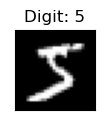

<Figure size 1600x1000 with 0 Axes>

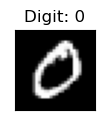

<Figure size 1600x1000 with 0 Axes>

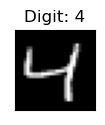

<Figure size 1600x1000 with 0 Axes>

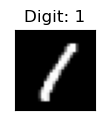

<Figure size 1600x1000 with 0 Axes>

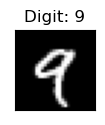

<Figure size 1600x1000 with 0 Axes>

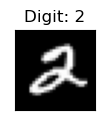

<Figure size 1600x1000 with 0 Axes>

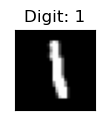

<Figure size 1600x1000 with 0 Axes>

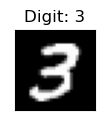

<Figure size 1600x1000 with 0 Axes>

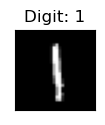

<Figure size 1600x1000 with 0 Axes>

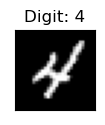

<Figure size 1600x1000 with 0 Axes>

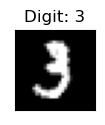

<Figure size 1600x1000 with 0 Axes>

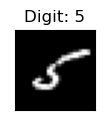

<Figure size 1600x1000 with 0 Axes>

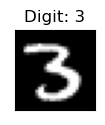

<Figure size 1600x1000 with 0 Axes>

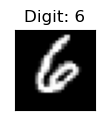

<Figure size 1600x1000 with 0 Axes>

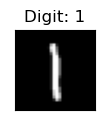

<Figure size 1600x1000 with 0 Axes>

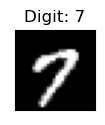

<Figure size 1600x1000 with 0 Axes>

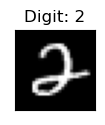

<Figure size 1600x1000 with 0 Axes>

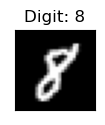

<Figure size 1600x1000 with 0 Axes>

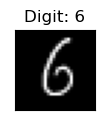

<Figure size 1600x1000 with 0 Axes>

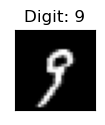

<Figure size 1600x1000 with 0 Axes>

In [13]:
for i in range(20):
  plot_digit(X_train[i], y_train[i], plt, i)
  plt.show()

In [14]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))


In [18]:
y_train = np.array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=np.uint8)
print(y_train[0:20])



[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [19]:
model = Sequential([
Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(100, activation="relu"),
Dense(10, activation="softmax")
])

In [20]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [22]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(len(x_train), len(y_train))


60000 60000


In [23]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 33s 14ms/step - loss: 0.2480 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0804 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0146 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0111 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0078 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 25s 13m

1/1 [==============================] - 2s 2s/step


C:\Users\admin\AppData\Local\Temp\ipykernel_18808\1968255758.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 10))


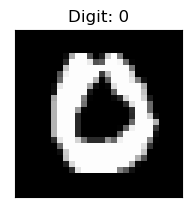

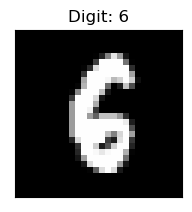

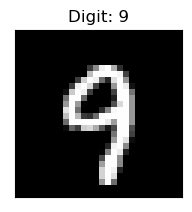

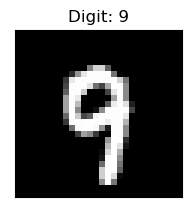

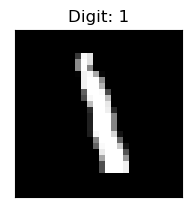

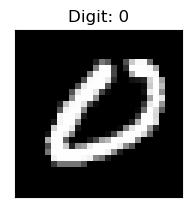

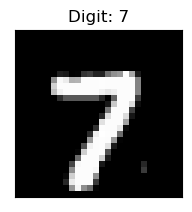

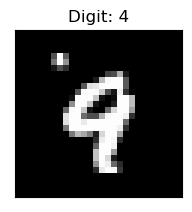

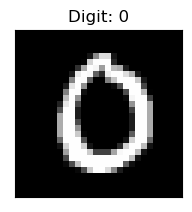

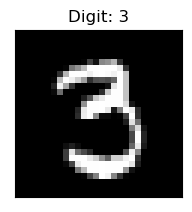

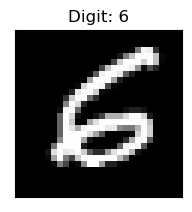

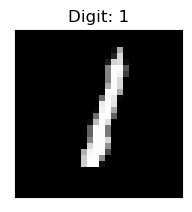

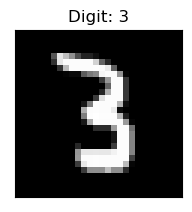

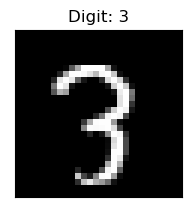

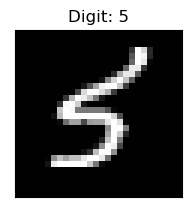

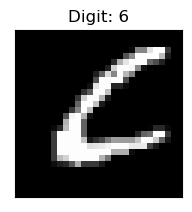

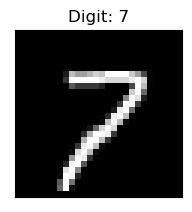

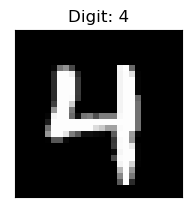

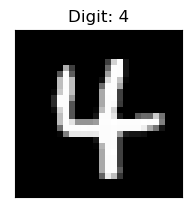

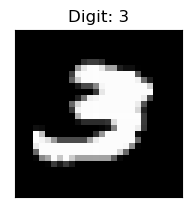

<Figure size 1600x1000 with 0 Axes>

In [25]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0],
 axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)), axis=-1)
    # Make sure you have the correct model for predictions
    # Also, make sure you have defined the plot_digit function
    plot_digit(image, digit, plt, i)

plt.show()